In [1]:
import torch
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from torch import nn # contains all the building blocks for neural networks

# Data Preperation


In [2]:
# create a linear regression like
weights = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weights * X + bias

# Data Split To Train And Test Set

In [3]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

 

# Data Visualisation

In [4]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):
    plt.figure(figsize=(10,7))

    # plot train data in blue
    plt.scatter(train_data,train_labels, c = 'b', s = 4, label = 'Training Data')

    # plot test data in green
    plt.scatter(test_data,test_labels, c = 'g', s = 4, label = 'Test data')

    # are there predictions?
    if predictions != None:
        plt.scatter(test_data,predictions, c = 'r', s =4, label = 'predictions')

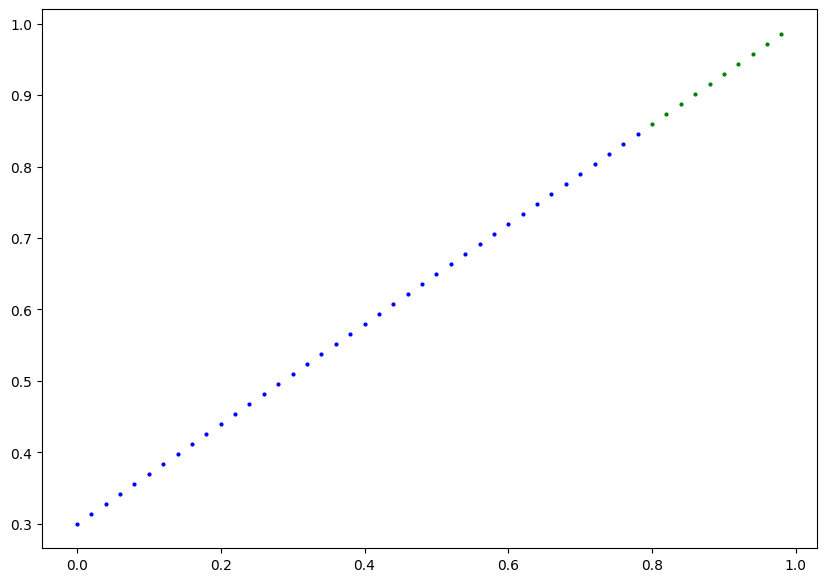

In [5]:
plot_predictions()

# Build Model

In [6]:
from torch import nn

# Creating a Linear Regression Class
class LinearRegressionClass(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    
    # to define the computation in the model
    def forward(self, x:torch.tensor) -> torch.tensor:
        return self.weights * x + self.bias 



# Checking the contents of Pytorch model
use '.parameters' to check whats inside the model


In [7]:
# create a random seed to understand values
torch.manual_seed(42)

# create an object of Linear regression class
model_0 = LinearRegressionClass()

# check parameters
list(model_0.parameters())

# list of named parameters -> provides the dictionaries of the parameters of the mdodels
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [8]:
# premise of deep learning is to start with random values and get close to these actual values. 
weights, bias

(0.7, 0.3)

# Make predictions to check how bad the model is

In [9]:
# use torch.inference_mode()
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

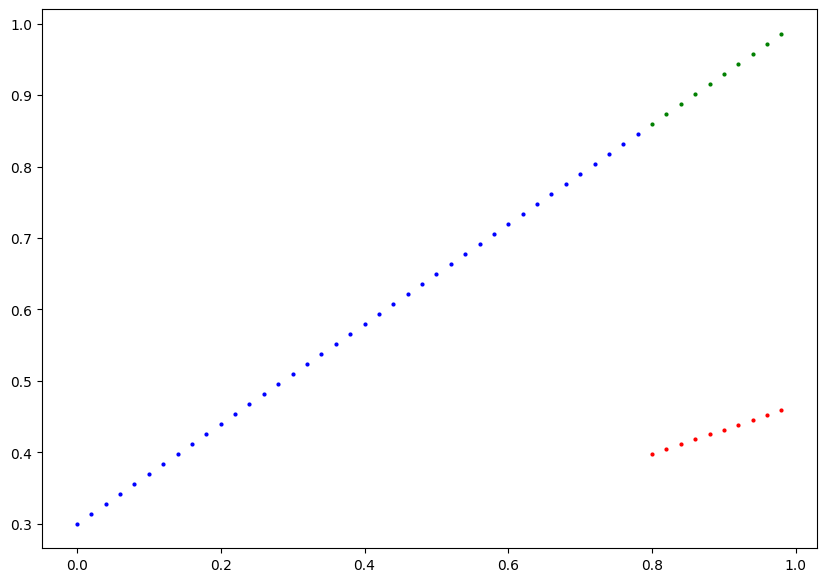

In [10]:
# we can obsere that with the random weights and bias the predictions are very bad. 
plot_predictions(predictions = y_preds)

# Training

The whole idea of training is for model to move from unknown parameters to good parameters. Move from bad representation of data to good representation of data.

Things we need to train:
* **Loss function**: A function to measure how wrong the models predictions are to the ideal outputs. Lower is better
* **optimizer**: Takes into account the loss of a model and adjust the parameters(weights and biases) to improve the loss the function.
    * inside the optimizer you have two set of parameters:
        * params - the model parameters that you would like to optimize
        * learning rate  - how big the each step needs to be while optimizing.

In Pytorch we need:
* Training loop
* Testing loop

Training loop: 
1. Loop through the data
2. set to training mode - this sets grad = true. It allows tracking of gradients.
3. Forward pass
4. Calculate the loss (compare the forward pass results with ground truth labels)
5. Optimize the zero grad
6. Loss backwards - move backwards through the network to calculate the gradients of each parameter with respect to the loss
7. optimizer step - use the optimizer to adjust the parameters and improve the loss (** Gradient Descent **)


In [11]:
# See the parameters
model_0.state_dict()

# set a loss function
loss_fn = torch.nn.L1Loss()

# create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.01) # learning rate

In [12]:
# Building a training loop
# epoch is one loop through the data

epochs = 200

# define list store values
epoch_values = []
train_loss_values = []
test_loss_values = []
for epoch in range(epochs):
    # set the model to training model. this sets grad = True
    model_0.train()

    # forward pass
    y_pred = model_0(X_train)

    # calculate loss 
    loss = loss_fn(y_pred, y_train)

    # optimizer grad zero
    optimizer.zero_grad()

    # perform back propogation on loss
    loss.backward()

    # step the optimizer (gradient descent)
    optimizer.step() # by default the optimizer changes will accumulate through the loop..so we need to zero them before the next iteration of the loop

    # Test loop
    # Set model to evalaution mode
    model_0.eval()

    # turn on inference mode
    with torch.inference_mode():

        # make forward pass on test data
        test_pred = model_0(X_test)

        # calculate test loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        epoch_values.append(epoch)
        train_loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch number : {epoch} | train loss : {loss} | test loss : {test_loss}")
        



Epoch number : 0 | train loss : 0.31288138031959534 | test loss : 0.48106518387794495
Epoch number : 10 | train loss : 0.1976713240146637 | test loss : 0.3463551998138428
Epoch number : 20 | train loss : 0.08908725529909134 | test loss : 0.21729660034179688
Epoch number : 30 | train loss : 0.053148526698350906 | test loss : 0.14464017748832703
Epoch number : 40 | train loss : 0.04543796554207802 | test loss : 0.11360953003168106
Epoch number : 50 | train loss : 0.04167863354086876 | test loss : 0.09919948130846024
Epoch number : 60 | train loss : 0.03818932920694351 | test loss : 0.08886633068323135
Epoch number : 70 | train loss : 0.03476089984178543 | test loss : 0.0805937647819519
Epoch number : 80 | train loss : 0.03132382780313492 | test loss : 0.07232122868299484
Epoch number : 90 | train loss : 0.02788739837706089 | test loss : 0.06473556160926819
Epoch number : 100 | train loss : 0.024458957836031914 | test loss : 0.05646304413676262
Epoch number : 110 | train loss : 0.02102020

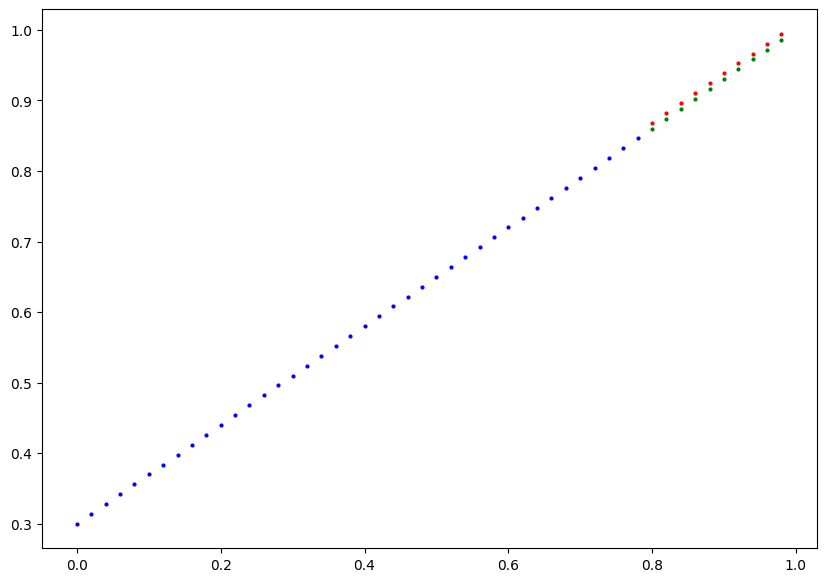

In [13]:
with torch.inference_mode():
    new_pred2 = model_0.forward(X_test)

plot_predictions(predictions=new_pred2)

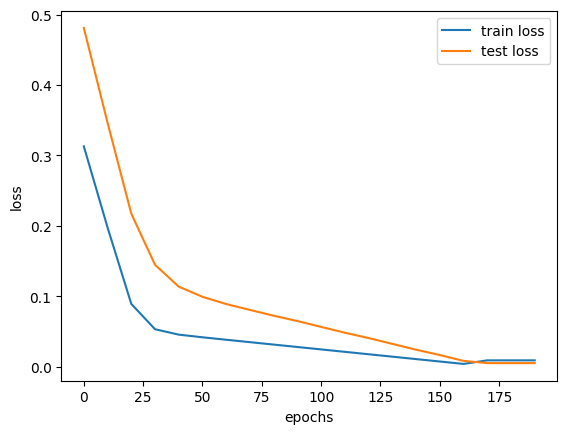

In [14]:
import numpy as np
plt.plot(epoch_values, np.array(torch.tensor(train_loss_values).numpy()), label= "train loss")
plt.plot(epoch_values, np.array(torch.tensor(test_loss_values).numpy()), label= "test loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend();